#Jhillian M. Cabos
CPE22S3

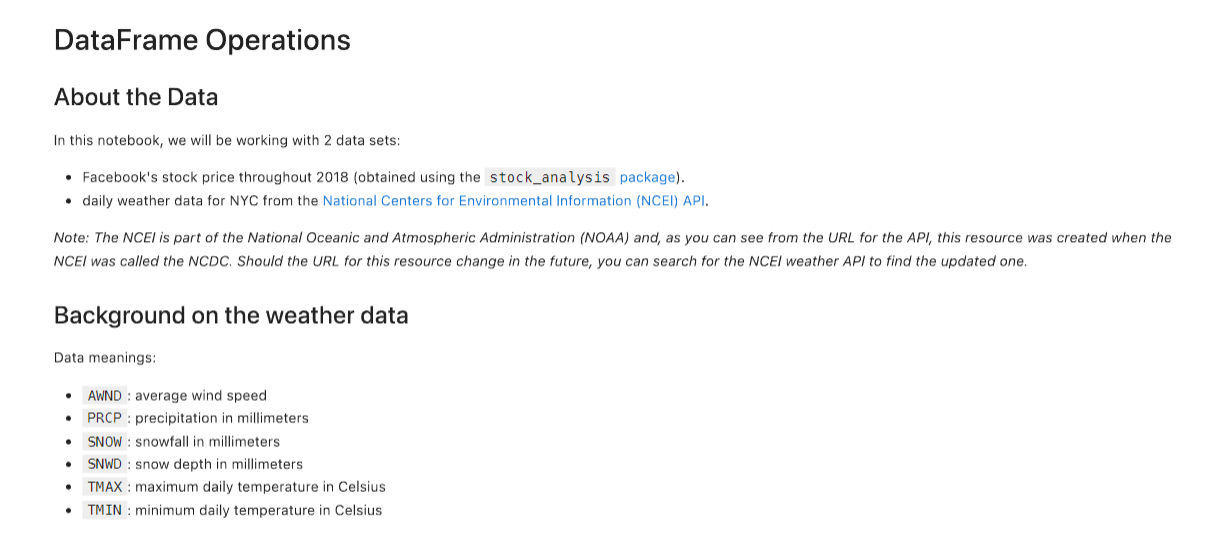

Set up

In [5]:
import numpy as np
import pandas as pd
weather = pd.read_csv('nyc_weather_2018 (1).csv', parse_dates=['date'])
weather.head()

,attributes,datatype,date,station,value
0,",,N,",PRCP,2018-01-01,GHCND:US1CTFR0039,0.0
1,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0015,0.0
2,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0015,0.0
3,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0017,0.0
4,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0017,0.0


In [4]:
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


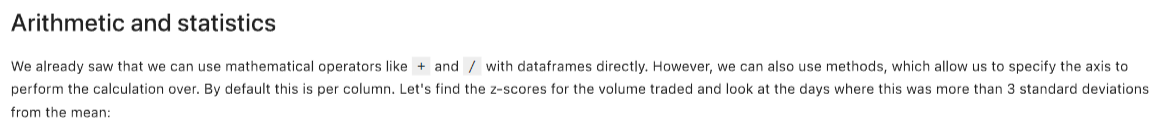

In [6]:
fb.assign(
abs_z_score_volume=lambda x: x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


We can use rank() and pct_change() to see which days had the largest change in volume traded from the day before:

In [7]:
fb.assign(
volume_pct_change=fb.volume.pct_change(),
pct_change_rank=lambda x: x.volume_pct_change.abs().rank(
ascending=False
)
).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


January 12th was when the news that Facebook changed its news feed product to focus more on content from a users' friends over the brands they follow. Given that
Facebook's advertising is a key component of its business (nearly 89% in 2017), many shares were sold and the price dropped in panic

In [8]:
fb['2018-01-11':'2018-01-12']

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


Throughout 2018, Facebook's stock price never had a low above $215:

In [9]:
(fb > 215).any()

open       True
high       True
low       False
close      True
volume     True
dtype: bool

Facebook's OHLC (open, high, low, and close) prices all had at least one day they were at $215 or less:

In [10]:
(fb > 215).all()

open      False
high      False
low       False
close     False
volume     True
dtype: bool

Binning and thresholds
When working with the volume traded, we may be interested in ranges of volume rather than the exact values. No two days have the same volume traded

In [11]:
(fb.volume.value_counts() > 1).sum()

0

We can use pd.cut() to create 3 bins of even an even range in volume traded and name them. Then we can work with low, medium, and high volume traded categories:

In [12]:
volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high'])
volume_binned.value_counts()

low     240
med       8
high      3
Name: volume, dtype: int64

In [13]:
fb[volume_binned == 'high'].sort_values(
'volume', ascending=False
)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


July 25th Facebook announced disappointing user growth and the stock tanked in the after hours:

In [14]:
fb['2018-07-25':'2018-07-26']

,open,high,low,close,volume
date,,,,,
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


Cambridge Analytica scandal broke on Saturday March 17th, so we look to the Monday for the numbers:

In [15]:
fb['2018-03-16':'2018-03-20']

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


Since most days have similar volume, but a few are very large, we have very wide bins. Most of the data is in the low bin.
Note: visualizations will be covered in chapters 5 and 6.

In [19]:
import matplotlib.pyplot as plt

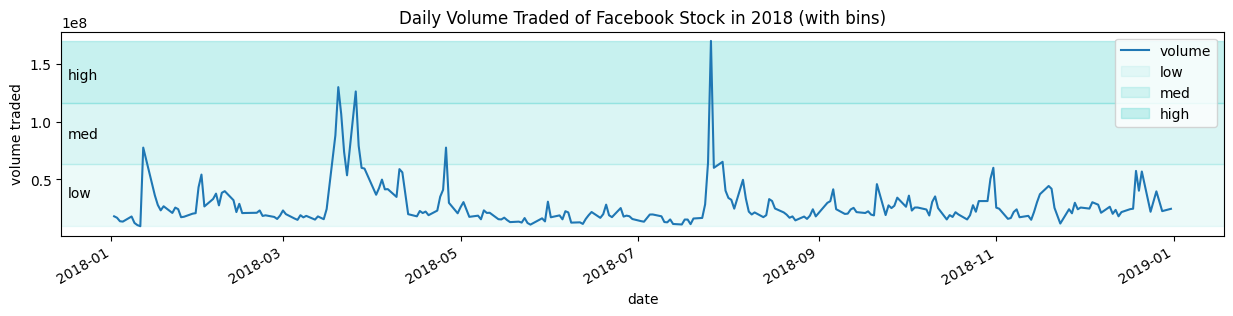

In [22]:
fb.plot(y='volume', figsize=(15, 3), title='Daily Volume Traded of Facebook Stock in 2018 (with bins)')

for bin_name, alpha, bounds in zip(
    ['low', 'med', 'high'], [0.1, 0.2, 0.3], pd.cut(fb.volume, bins=3).unique().categories.values
):
      plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
      plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))
plt.ylabel('volume traded')
plt.legend()
plt.show()

If we split using quantiles, the bins will have roughly the same number of observations. For this, we use qcut() . We will make 4 quartiles:

In [23]:
volume_qbinned = pd.qcut(fb.volume, q=4, labels=['q1', 'q2', 'q3', 'q4'])
volume_qbinned.value_counts()

q1    63
q2    63
q4    63
q3    62
Name: volume, dtype: int64

Notice the bins don't cover ranges of the same size anymore:

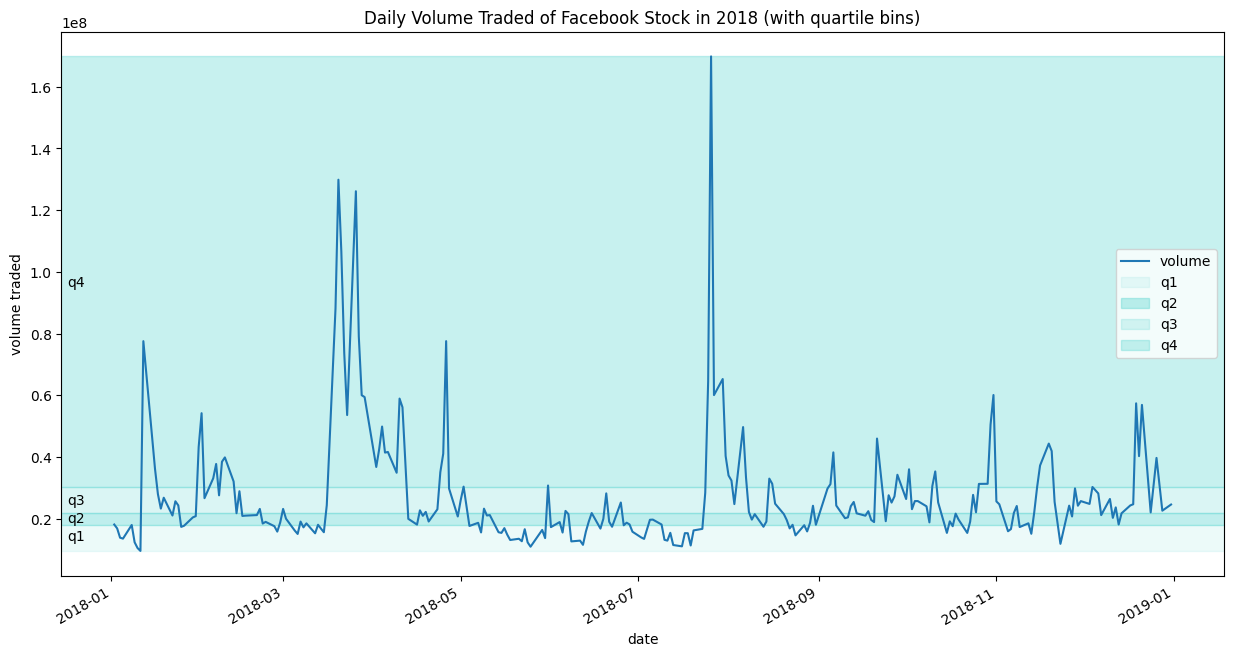

In [24]:
fb.plot(y='volume', figsize=(15, 8), title='Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)')
for bin_name, alpha, bounds in zip(
    ['q1', 'q2', 'q3', 'q4'], [0.1, 0.35, 0.2, 0.3], pd.qcut(fb.volume, q=4).unique().categories.values
):
    plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
    plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))
plt.ylabel('volume traded')
plt.legend()
plt.show()

Sometimes we don't want to make bins, but rather cap values at a threshold. Before we look at an example, let's pivot our weather data for the Central Park station:

In [26]:
central_park_weather = weather.query(
    'station == "GHCND:USW00094728"'
).pivot(index='date', columns='datatype', values='value')

Say we don't care how much snow their was, just that it snowed in Central Park. However, we don't want to make a Boolean column since we need to preserve the data type of
float. We can use clip() to replace values above a upper threshold with the threshold and replace values below a lower threshold with the lower threshold. This means we
can use clip(0, 1) to change all the snow values of one or more to 1, which easily shows us the days snow was recorded in Central Park. Preserving the data type will
save some work later on if we are building a model:

In [27]:
central_park_weather.SNOW.clip(0, 1).value_counts()

0.0    157
1.0     10
Name: SNOW, dtype: int64

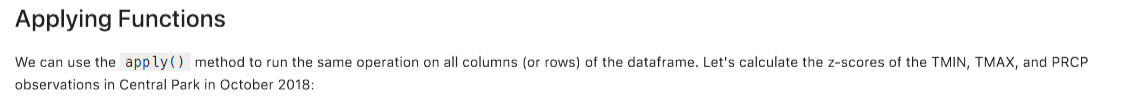

In [51]:
central_park_weather.index()

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-06-07', '2018-06-08', '2018-06-09', '2018-06-10',
               '2018-06-11', '2018-06-12', '2018-06-13', '2018-06-14',
               '2018-06-15', '2018-06-16'],
              dtype='datetime64[ns]', name='date', length=167, freq=None)


In [52]:
oct_weather_z_scores = central_park_weather.loc[
    '2018-06', ['TMIN', 'TMAX', 'PRCP']
].apply(lambda x: x.sub(x.mean()).div(x.std()))
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,16.0,5.551115e-17,1.0,-1.859961,-0.489226,-0.056362,0.782311,1.314372
TMAX,16.0,4.579670e-16,1.0,-1.793032,-0.723116,-0.243498,0.870690,1.660214
PRCP,16.0,5.551115e-17,1.0,-0.547723,-0.547723,-0.547723,-0.018522,2.373466


In [53]:
oct_weather_z_scores.query('PRCP > 3')

datatype,TMIN,TMAX,PRCP
date,,,


Indeed, this day was much higher than the rest:

In [55]:
central_park_weather.loc['2018-06', 'PRCP'].describe()

count    16.000000
mean      1.293750
std       2.362052
min       0.000000
25%       0.000000
50%       0.000000
75%       1.250000
max       6.900000
Name: PRCP, dtype: float64

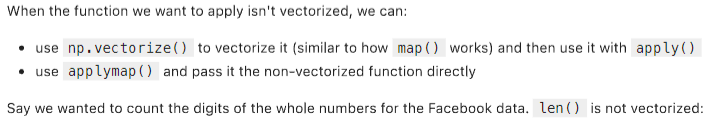

In [56]:
import numpy as np
fb.apply(
lambda x: np.vectorize(lambda y: len(str(np.ceil(y))))(x)
).astype('int64').equals(
fb.applymap(lambda x: len(str(np.ceil(x))))
)

True

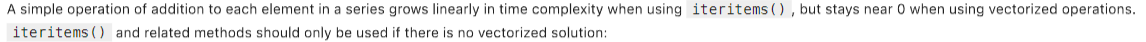

<ipython-input-58-7dcf798bb3c6>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in test.iteritems():


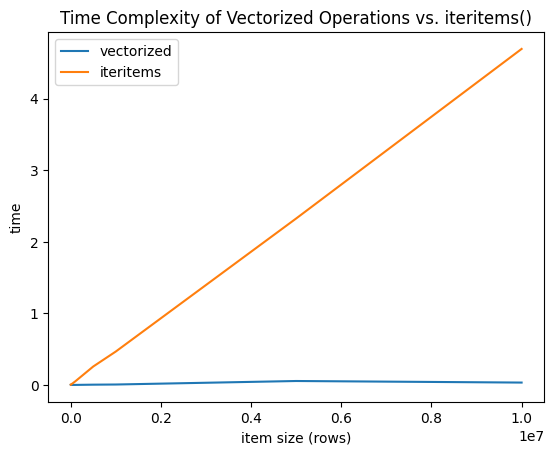

In [58]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)
vectorized_results = {}
iteritems_results = {}

for size in [10, 100, 1000, 10000, 100000, 500000, 1000000, 5000000, 10000000]:
    test = pd.Series(np.random.uniform(size=size))

    start = time.time()
    x = test + 10
    end = time.time()
    vectorized_results[size] = end - start

    start = time.time()
    x = []
    for i, v in test.iteritems():
        x.append(v + 10)
    x = pd.Series(x)
    end = time.time()
    iteritems_results[size] = end - start

pd.DataFrame(
    [pd.Series(vectorized_results, name='vectorized'), pd.Series(iteritems_results, name='iteritems')]
).T.plot(title='Time Complexity of Vectorized Operations vs. iteritems()')

plt.xlabel('item size (rows)')
plt.ylabel('time')
plt.show()


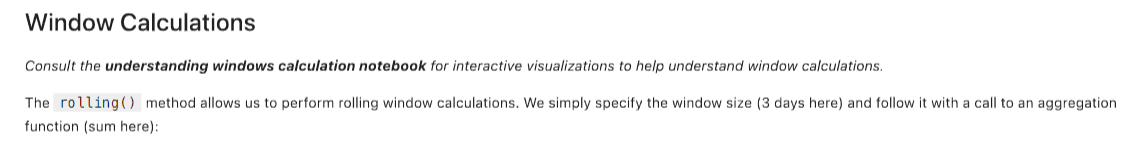

In [60]:
central_park_weather['2018-06'].assign(
rolling_PRCP=lambda x: x.PRCP.rolling('3D').sum()
)[['PRCP', 'rolling_PRCP']].head(7).T

<ipython-input-60-c4b67a184152>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-06'].assign(


date,2018-06-01,2018-06-02,2018-06-03,2018-06-04,2018-06-05,2018-06-06,2018-06-07
datatype,,,,,,,
PRCP,6.9,2.0,6.4,4.1,0.0,0.0,0.0
rolling_PRCP,6.9,8.9,15.3,12.5,10.5,4.1,0.0


We can also perform the rolling calculations on the entire dataframe at once. This will apply the same aggregation function to each column

In [62]:
central_park_weather['2018-06'].rolling('3D').mean().head(7).iloc[:,:6]

<ipython-input-62-9096c6607f70>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-06'].rolling('3D').mean().head(7).iloc[:,:6]


datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,,
2018-06-01,0.400000,6.900000,0.0,0.0,27.200000,18.300000
2018-06-02,1.050000,4.450000,0.0,0.0,28.900000,18.600000
2018-06-03,1.566667,5.100000,0.0,0.0,25.566667,15.933333
2018-06-04,2.000000,4.166667,0.0,0.0,23.733333,13.366667
2018-06-05,2.000000,3.500000,0.0,0.0,21.500000,11.866667
2018-06-06,1.533333,1.366667,0.0,0.0,22.433333,13.133333
2018-06-07,1.333333,0.000000,0.0,0.0,22.433333,14.800000


We can use different aggregation functions per column if we use agg() instead. We pass in a dictionary mapping the column to the aggregation to perform on it

In [63]:
central_park_weather['2018-10-01':'2018-10-07'].rolling('3D').agg(
{'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'}
).join( # join with original data for comparison
central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
lsuffix='_rolling'
).sort_index(axis=1) # sort columns so rolling calcs are next to originals

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,


In [64]:
central_park_weather['2018-06-01':'2018-06-07'].rolling('3D').agg(
{'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'}
).join( # join with original data for comparison
central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
lsuffix='_rolling'
).sort_index(axis=1) # sort columns so rolling calcs are next to originals

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,
2018-06-01,0.4,0.400000,6.9,6.9,27.2,27.2,18.3,18.3
2018-06-02,1.7,1.050000,2.0,8.9,30.6,30.6,18.9,18.3
2018-06-03,2.6,1.566667,6.4,15.3,18.9,30.6,10.6,10.6
2018-06-04,1.7,2.000000,4.1,12.5,21.7,30.6,10.6,10.6
2018-06-05,1.7,2.000000,0.0,10.5,23.9,23.9,14.4,10.6
2018-06-06,1.2,1.533333,0.0,4.1,21.7,23.9,14.4,10.6
2018-06-07,1.1,1.333333,0.0,0.0,21.7,23.9,15.6,14.4


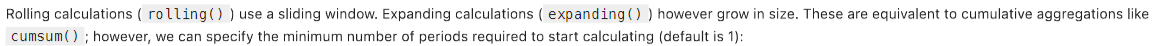

In [68]:
central_park_weather.PRCP.expanding().sum().equals(central_park_weather.PRCP.cumsum())

False

In [67]:
central_park_weather.PRCP.expanding().sum()
central_park_weather.PRCP.cumsum()

date
2018-01-01      0.0
2018-01-02      0.0
2018-01-03      0.0
2018-01-04     19.3
2018-01-05     19.3
              ...  
2018-06-12    590.9
2018-06-13    591.9
2018-06-14    591.9
2018-06-15    591.9
2018-06-16    591.9
Name: PRCP, Length: 167, dtype: float64

In [70]:
central_park_weather['2018-06-01':'2018-06-07'].expanding().agg(
{'TMAX': np.max, 'TMIN': np.min, 'AWND': np.mean, 'PRCP': np.sum}
).join(
central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
lsuffix='_expanding'
).sort_index(axis=1)

datatype,AWND,AWND_expanding,PRCP,PRCP_expanding,TMAX,TMAX_expanding,TMIN,TMIN_expanding
date,,,,,,,,
2018-06-01,0.4,0.400000,6.9,6.9,27.2,27.2,18.3,18.3
2018-06-02,1.7,1.050000,2.0,8.9,30.6,30.6,18.9,18.3
2018-06-03,2.6,1.566667,6.4,15.3,18.9,30.6,10.6,10.6
2018-06-04,1.7,1.600000,4.1,19.4,21.7,30.6,10.6,10.6
2018-06-05,1.7,1.620000,0.0,19.4,23.9,30.6,14.4,10.6
2018-06-06,1.2,1.550000,0.0,19.4,21.7,30.6,14.4,10.6
2018-06-07,1.1,1.485714,0.0,19.4,21.7,30.6,15.6,10.6


In [71]:
fb.assign(
close_ewma=lambda x: x.close.ewm(span=5).mean()
).tail(10)[['close', 'close_ewma']]

,close,close_ewma
date,,
2018-12-17,140.19,142.235433
2018-12-18,143.66,142.710289
2018-12-19,133.24,139.553526
2018-12-20,133.40,137.502350
2018-12-21,124.95,133.318234
2018-12-24,124.06,130.232156
2018-12-26,134.18,131.548104
2018-12-27,134.52,132.538736
2018-12-28,133.20,132.759157


Consult the understanding_window_calculations.ipynb notebook for interactive visualizations to help understand window calculations.

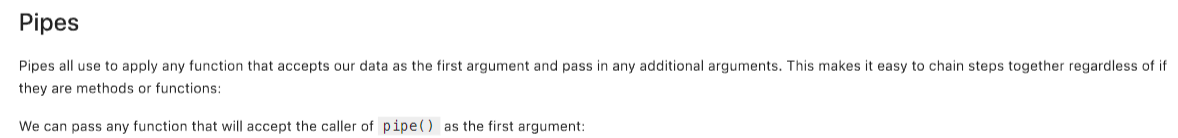

In [73]:
def get_info(df):
  return '%d rows and %d columns and max closing z-score was %d' % (*df.shape, df.close.max())
fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()).pipe(get_info)\
== get_info(fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()))

<ipython-input-73-686261bd3122>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()).pipe(get_info)\
<ipython-input-73-686261bd3122>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  == get_info(fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()))


True

For example, passing pd.DataFrame.rolling to pipe() is equivalent to calling rolling() directly on the dataframe, except we have more flexiblity to change this

In [74]:
fb.pipe(pd.DataFrame.rolling, '20D').mean().equals(fb.rolling('20D').mean())

True

The pipe takes the function passed in and calls it with the object that called pipe() as the first argument. Positional and keyword arguments are passed down:

In [75]:
pd.DataFrame.rolling(fb, '20D').mean().equals(fb.rolling('20D').mean())

True

We can use a pipe to make a function that we can use for all our window calculation needs:

In [85]:
import pandas as pd
import numpy as np
# Define the window_calc function
def window_calc(df, func, agg_dict, *args, **kwargs):
    """
    Run a window calculation of your choice on a DataFrame.
    Parameters:
    - df: The DataFrame to run the calculation on.
    - func: The window calculation method that takes df
    as the first argument.
    - agg_dict: Information to pass to `agg()`, could be a
    dictionary mapping the columns to the aggregation
    function to use, a string name for the function,
    or the function itself.
    - args: Positional arguments to pass to `func`.
    - kwargs: Keyword arguments to pass to `func`.
    Returns:
    - A new DataFrame object.
    """
    return df.pipe(func, *args, **kwargs).agg(agg_dict)
fb = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Price': np.random.rand(10) * 100
})
result = window_calc(fb, pd.DataFrame.expanding, {'Price': np.median}, min_periods=1)
print(result)

       Price
0  47.501462
1  43.634284
2  45.797076
3  44.435832
4  43.074588
5  42.201849
6  43.074588
7  44.435832
8  45.797076
9  45.960000


We can use the same interface to calculate various window calculations now. Let's find the expanding median for the Facebook data:

In [86]:
window_calc(fb, pd.DataFrame.expanding, np.median).head()

<ipython-input-85-6d02c3328600>:21: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  return df.pipe(func, *args, **kwargs).agg(agg_dict)


,Price
0,47.501462
1,43.634284
2,45.797076
3,44.435832
4,43.074588


Using the exponentially weighted moving average requires we pass in a keyword argument

In [87]:
window_calc(fb, pd.DataFrame.ewm, 'mean', span=3).head()

<ipython-input-85-6d02c3328600>:21: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  return df.pipe(func, *args, **kwargs).agg(agg_dict)


,Price
0,47.501462
1,42.345224
2,44.317711
3,43.654712
4,42.454401


With rolling calculations, we can pass in a positional argument for the window size:

In [90]:
window_calc(
    central_park_weather['2018-06'],
    pd.DataFrame.rolling,
     {'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'},
    '3D'
).head()

<ipython-input-90-8173ac6daa15>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-06'],


datatype,TMAX,TMIN,AWND,PRCP
date,,,,
2018-06-01,27.2,18.3,0.400000,6.9
2018-06-02,30.6,18.3,1.050000,8.9
2018-06-03,30.6,10.6,1.566667,15.3
2018-06-04,30.6,10.6,2.000000,12.5
2018-06-05,23.9,10.6,2.000000,10.5


In this notebook, we analyze Facebook's 2018 stock prices alongside daily weather data for NYC. We conduct arithmetic operations, calculate statistics like z-scores, and identify days with significant volume changes. We also categorize volume data and examine extreme weather events in NYC. By applying functions, conducting rolling and expanding window calculations, and using data processing pipelines, we gain insights into both the stock market and weather patterns.In my case, my October 2018 didnt have any value so i changed it to June 2018